In [27]:
# Data manipulation
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Maths
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [28]:
# Load the data
survey_amiens:pd.DataFrame = pd.read_csv("data/survey-amiens-ue-trans-01.csv")
print(survey_amiens.columns)
survey_amiens

Index(['Horodateur', 'Quel est votre niveau d'étude ?',
       'Quel est votre niveau en développement (problem solving & software) ?',
       'Pratiquez vous le problem solving (compétition de code) ?',
       'Vous-arrive t-il de l'utiliser du code générer par l'IA sans pour autant le comprendre ?',
       'À quelle fréquence utilisez vous les LLM ?',
       'A quelle fin utilisez-vous les LLM ?',
       'Quels langages de programmation connaissez-vous?',
       'Que va afficher le programme suivant ? ',
       'Quel sera le résultat de ce code ? ',
       'Que retourne cet appel de fonction ? ',
       'Dans quel langage de programmation les exercices de code ont été écrits ?',
       'Comment avez-vous résolu les questions de codes ?',
       'Vous arrive-t-il de verifier ou de remettre en question les réponses fournies par LLM ?'],
      dtype='object')


,Horodateur,Quel est votre niveau d'étude ?,Quel est votre niveau en développement (problem solving & software) ?,Pratiquez vous le problem solving (compétition de code) ?,Vous-arrive t-il de l'utiliser du code générer par l'IA sans pour autant le comprendre ?,À quelle fréquence utilisez vous les LLM ?,A quelle fin utilisez-vous les LLM ?,Quels langages de programmation connaissez-vous?,Que va afficher le programme suivant ?,Quel sera le résultat de ce code ?,Que retourne cet appel de fonction ?,Dans quel langage de programmation les exercices de code ont été écrits ?,Comment avez-vous résolu les questions de codes ?,Vous arrive-t-il de verifier ou de remettre en question les réponses fournies par LLM ?
0,19/12/2024 23:22:37,Master - Cycle ingénieur,4,Oui,Assez souvent,Assez souvent,"Comprendre, pour résoudre un probléme","JAVA, C, Flutter",1 2 3 4 5,"[1, 9, 25]",7,aucune réponse n'est correcte,Refléxion personnelle,Souvent
1,20/12/2024 15:14:12,Master 1,3,Non,Jamais,Assez souvent,"Comprendre, pour résoudre un probléme","JAVA, C, C#, Python, C++",2 4,"[1, 4, 9, 16, 25]",7,C++,Refléxion personnelle,Souvent
2,20/12/2024 15:39:50,Licence 1,1,Non,Assez souvent,Jamais,pour résoudre un probléme,"JAVA, C",2 4,"[1, 4, 9, 16, 25]",7,C,Refléxion personnelle,Jamais
3,20/12/2024 15:44:10,Licence 3,2,Non,Souvent,Souvent,pour résoudre un probléme,"JAVA, C, C#, Python, C++",2 4,"[1, 9, 25]",7,C#,Refléxion personnelle,Jamais
4,21/12/2024 13:13:45,Master 1,3,Oui,Assez souvent,Souvent,"Comprendre, pour résoudre un probléme","JAVA, C, C#, C++",2 4,"[1, 9, 25]",6,Python,Refléxion personnelle,Souvent
5,21/12/2024 13:14:32,Master 1,4,Oui,Souvent,Souvent,"Comprendre, pour résoudre un probléme","JAVA, C, C#, Python, C++",2 4,"[1, 9, 25]",7,Python,Refléxion personnelle,Souvent
6,16/01/2025 14:14:34,Master 1,3,Non,Trés souvent,Trés souvent,"Comprendre, pour résoudre un probléme","JAVA, C, Python",2 4,"[1, 3, 5]",7,JAVA,Refléxion personnelle,Rarement
7,16/01/2025 14:35:44,Master 1,3,Oui,Souvent,Assez souvent,Comprendre,"JAVA, C, C#, C++",Rien n'est affiché,"[1, 9, 25]",7,JAVA,À l'aide de Chatgpt,Souvent
8,16/01/2025 14:43:45,Master 2,2,Non,Souvent,Trés souvent,"Comprendre, pour résoudre un probléme","JAVA, C, C#, Python, C++",Rien n'est affiché,"[1, 9, 25]",7,Python,Refléxion personnelle,Souvent
9,16/01/2025 14:43:51,Master 1,2,Non,Souvent,Trés souvent,"Comprendre, pour résoudre un probléme","JAVA, C, C#, Python",2 4,"[1, 3, 5]",6,Python,Refléxion personnelle,Rarement


In [29]:
# Rename the interesting columns
survey_amiens.columns = [   "timestamp", 
                            "year",
                            "software-level",
                            "probleme-solving",
                            "code-generated-without-understanding",
                            "llm-use-frequency",
                            "llm-use-type",
                            "programming-language",
                            "test-code-1",
                            "test-code-2",
                            "test-code-3",
                            "test-language",
                            "test-code-method",
                            "llm-doubt"]
# Evaluate the participants based on their answers - the good ones are entered as raw data manually here.
survey_amiens["evaluation"] = 0
survey_amiens["test-code-2"] = survey_amiens["test-code-2"].str.replace('"', "")
survey_amiens.loc[survey_amiens['test-code-1'] == "2 4", 'evaluation'] += 1
survey_amiens.loc[survey_amiens['test-code-2'] == "[1, 9, 25]", 'evaluation'] += 1
survey_amiens.loc[survey_amiens['test-code-3'] == 7, 'evaluation'] += 1
survey_amiens

,timestamp,year,software-level,probleme-solving,code-generated-without-understanding,llm-use-frequency,llm-use-type,programming-language,test-code-1,test-code-2,test-code-3,test-language,test-code-method,llm-doubt,evaluation
0,19/12/2024 23:22:37,Master - Cycle ingénieur,4,Oui,Assez souvent,Assez souvent,"Comprendre, pour résoudre un probléme","JAVA, C, Flutter",1 2 3 4 5,"[1, 9, 25]",7,aucune réponse n'est correcte,Refléxion personnelle,Souvent,2
1,20/12/2024 15:14:12,Master 1,3,Non,Jamais,Assez souvent,"Comprendre, pour résoudre un probléme","JAVA, C, C#, Python, C++",2 4,"[1, 4, 9, 16, 25]",7,C++,Refléxion personnelle,Souvent,2
2,20/12/2024 15:39:50,Licence 1,1,Non,Assez souvent,Jamais,pour résoudre un probléme,"JAVA, C",2 4,"[1, 4, 9, 16, 25]",7,C,Refléxion personnelle,Jamais,2
3,20/12/2024 15:44:10,Licence 3,2,Non,Souvent,Souvent,pour résoudre un probléme,"JAVA, C, C#, Python, C++",2 4,"[1, 9, 25]",7,C#,Refléxion personnelle,Jamais,3
4,21/12/2024 13:13:45,Master 1,3,Oui,Assez souvent,Souvent,"Comprendre, pour résoudre un probléme","JAVA, C, C#, C++",2 4,"[1, 9, 25]",6,Python,Refléxion personnelle,Souvent,2
5,21/12/2024 13:14:32,Master 1,4,Oui,Souvent,Souvent,"Comprendre, pour résoudre un probléme","JAVA, C, C#, Python, C++",2 4,"[1, 9, 25]",7,Python,Refléxion personnelle,Souvent,3
6,16/01/2025 14:14:34,Master 1,3,Non,Trés souvent,Trés souvent,"Comprendre, pour résoudre un probléme","JAVA, C, Python",2 4,"[1, 3, 5]",7,JAVA,Refléxion personnelle,Rarement,2
7,16/01/2025 14:35:44,Master 1,3,Oui,Souvent,Assez souvent,Comprendre,"JAVA, C, C#, C++",Rien n'est affiché,"[1, 9, 25]",7,JAVA,À l'aide de Chatgpt,Souvent,2
8,16/01/2025 14:43:45,Master 2,2,Non,Souvent,Trés souvent,"Comprendre, pour résoudre un probléme","JAVA, C, C#, Python, C++",Rien n'est affiché,"[1, 9, 25]",7,Python,Refléxion personnelle,Souvent,2
9,16/01/2025 14:43:51,Master 1,2,Non,Souvent,Trés souvent,"Comprendre, pour résoudre un probléme","JAVA, C, C#, Python",2 4,"[1, 3, 5]",6,Python,Refléxion personnelle,Rarement,1


In [30]:
# We only keep the colums related to LLMs
del survey_amiens["timestamp"]
del survey_amiens["programming-language"]
del survey_amiens["test-code-1"]
del survey_amiens["test-code-2"]
del survey_amiens["test-code-3"]
del survey_amiens["test-language"]
del survey_amiens["year"]
del survey_amiens["software-level"]
del survey_amiens["probleme-solving"]

encoder:LabelEncoder = LabelEncoder()
survey_amiens_cluster:pd.DataFrame = survey_amiens.copy()
del survey_amiens_cluster["evaluation"]
survey_amiens_cluster

,code-generated-without-understanding,llm-use-frequency,llm-use-type,test-code-method,llm-doubt
0,Assez souvent,Assez souvent,"Comprendre, pour résoudre un probléme",Refléxion personnelle,Souvent
1,Jamais,Assez souvent,"Comprendre, pour résoudre un probléme",Refléxion personnelle,Souvent
2,Assez souvent,Jamais,pour résoudre un probléme,Refléxion personnelle,Jamais
3,Souvent,Souvent,pour résoudre un probléme,Refléxion personnelle,Jamais
4,Assez souvent,Souvent,"Comprendre, pour résoudre un probléme",Refléxion personnelle,Souvent
5,Souvent,Souvent,"Comprendre, pour résoudre un probléme",Refléxion personnelle,Souvent
6,Trés souvent,Trés souvent,"Comprendre, pour résoudre un probléme",Refléxion personnelle,Rarement
7,Souvent,Assez souvent,Comprendre,À l'aide de Chatgpt,Souvent
8,Souvent,Trés souvent,"Comprendre, pour résoudre un probléme",Refléxion personnelle,Souvent
9,Souvent,Trés souvent,"Comprendre, pour résoudre un probléme",Refléxion personnelle,Rarement


In [31]:
# Encode valuable columns
survey_amiens_cluster["code-generated-without-understanding"] = encoder.fit_transform(survey_amiens_cluster["code-generated-without-understanding"])
survey_amiens_cluster["llm-use-frequency"] = encoder.fit_transform(survey_amiens_cluster["llm-use-frequency"])
survey_amiens_cluster["llm-use-type"] = encoder.fit_transform(survey_amiens_cluster["llm-use-type"])
survey_amiens_cluster["test-code-method"] = encoder.fit_transform(survey_amiens_cluster["test-code-method"])
survey_amiens_cluster["llm-doubt"] = encoder.fit_transform(survey_amiens_cluster["llm-doubt"])

survey_amiens_cluster

,code-generated-without-understanding,llm-use-frequency,llm-use-type,test-code-method,llm-doubt
0,0,0,1,0,2
1,1,0,1,0,2
2,0,1,2,0,0
3,2,2,2,0,0
4,0,2,1,0,2
5,2,2,1,0,2
6,3,3,1,0,1
7,2,0,0,1,2
8,2,3,1,0,2
9,2,3,1,0,1


In [32]:
### --- Kmeans process --- ###
n_dimensions:int = 8
wcss:list = []
for n in range(1, n_dimensions):
    kmeans:KMeans= KMeans(n_clusters=n)
    kmeans.fit(survey_amiens_cluster)
    survey_amiens_cluster[f"kmeans_{n}"] = kmeans.labels_
    wcss.append(kmeans.inertia_)

survey_amiens_cluster

,code-generated-without-understanding,llm-use-frequency,llm-use-type,test-code-method,llm-doubt,kmeans_1,kmeans_2,kmeans_3,kmeans_4,kmeans_5,kmeans_6,kmeans_7
0,0,0,1,0,2,0,0,2,0,3,5,3
1,1,0,1,0,2,0,0,2,3,0,2,2
2,0,1,2,0,0,0,0,0,2,2,1,5
3,2,2,2,0,0,0,1,1,1,1,0,4
4,0,2,1,0,2,0,0,0,2,2,1,1
5,2,2,1,0,2,0,1,1,1,1,4,0
6,3,3,1,0,1,0,1,1,1,1,4,0
7,2,0,0,1,2,0,0,2,3,0,2,2
8,2,3,1,0,2,0,1,1,1,1,4,0
9,2,3,1,0,1,0,1,1,1,1,4,0


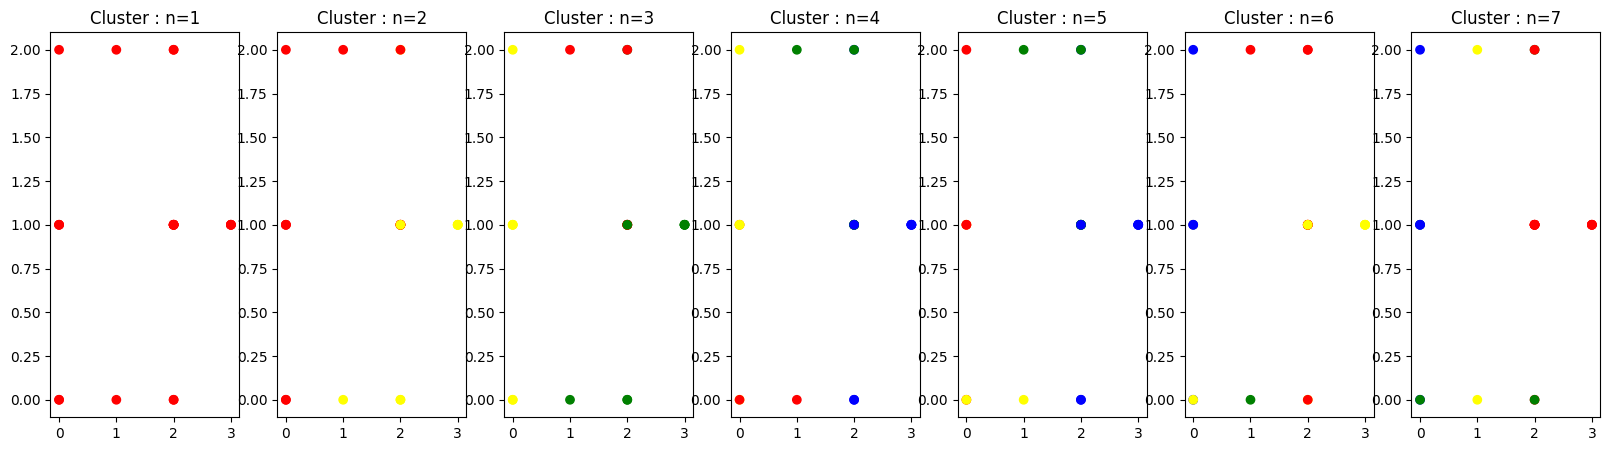

In [33]:
### --- Plot kmeans --- ###s
fig, axs = plt.subplots(nrows=1, ncols=n_dimensions-1, figsize=(20, 5))
custom_cmap:ListedColormap = ListedColormap(['red', 'blue', 'green', 'yellow'])
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=survey_amiens_cluster['llm-use-frequency'], y=survey_amiens_cluster['llm-use-type'], c=survey_amiens_cluster[f"kmeans_{i}"], cmap=custom_cmap)
    ax.set_title(f"Cluster : n={i}")

In [34]:
# We can see that the evolution of profiles is distinguishable, on the figure 4, let's compare the green(2) and the red(0) clusters evaulation.

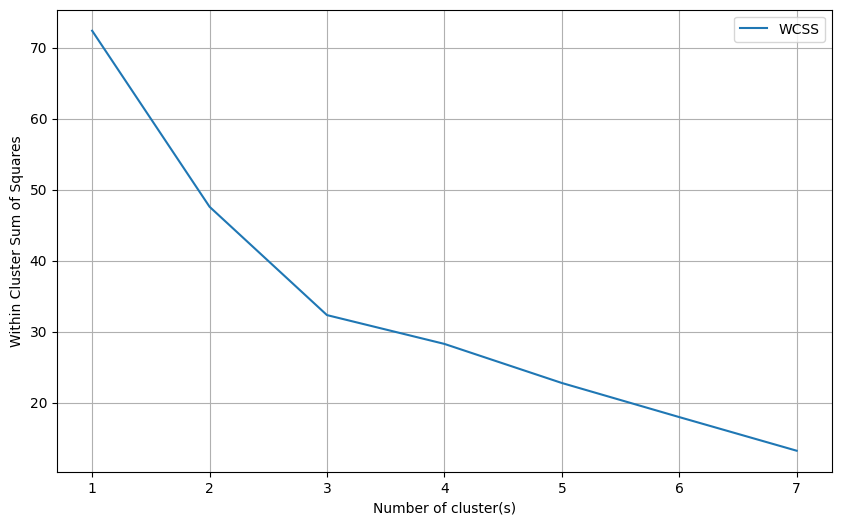

In [35]:
# See : https://anisse-imerzoukene.notion.site/K-means-185d37ed979d80ebac2bcdc38fa86a1c?pvs=4
# The best number is 4 - the decreasing speed of wcss breaks at point (4, 27)
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), wcss, label='WCSS')
plt.xlabel('Number of cluster(s)')
plt.ylabel('Within Cluster Sum of Squares')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
survey_amiens_cluster:pd.DataFrame = survey_amiens_cluster[["code-generated-without-understanding", "llm-use-frequency", "llm-use-type", "test-code-method", "llm-doubt", "kmeans_4"]]
survey_amiens_cluster

,code-generated-without-understanding,llm-use-frequency,llm-use-type,test-code-method,llm-doubt,kmeans_4
0,0,0,1,0,2,0
1,1,0,1,0,2,3
2,0,1,2,0,0,2
3,2,2,2,0,0,1
4,0,2,1,0,2,2
5,2,2,1,0,2,1
6,3,3,1,0,1,1
7,2,0,0,1,2,3
8,2,3,1,0,2,1
9,2,3,1,0,1,1


In [37]:
df_cluster_evaluation:pd.DataFrame = survey_amiens_cluster.join(survey_amiens["evaluation"], rsuffix='_joined')
df_cluster_evaluation

,code-generated-without-understanding,llm-use-frequency,llm-use-type,test-code-method,llm-doubt,kmeans_4,evaluation
0,0,0,1,0,2,0,2
1,1,0,1,0,2,3,2
2,0,1,2,0,0,2,2
3,2,2,2,0,0,1,3
4,0,2,1,0,2,2,2
5,2,2,1,0,2,1,3
6,3,3,1,0,1,1,2
7,2,0,0,1,2,3,2
8,2,3,1,0,2,1,2
9,2,3,1,0,1,1,1


In [38]:
df_results:pd.DataFrame = df_cluster_evaluation.groupby(["kmeans_4"]).aggregate({"evaluation": "mean"})
df_results["colours"] = ["red", "blue", "green", "yellow"]
df_results
# We can understand that the people, based on the previous choosend colours (green and red clusters), succeed more often when they use AI but use it as a way of understanding not just rendering.

,evaluation,colours
kmeans_4,,
0,2.000000,red
1,1.888889,blue
2,2.166667,green
3,2.250000,yellow


/tmp/ipykernel_69126/3341909113.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


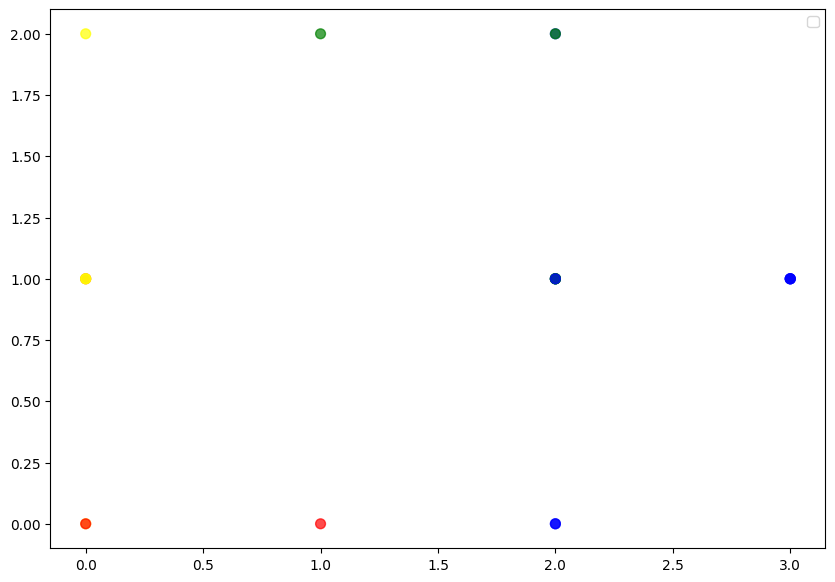

In [39]:
# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(x=survey_amiens_cluster['llm-use-frequency'], y=survey_amiens_cluster['llm-use-type'], c=survey_amiens_cluster['kmeans_4'], cmap=custom_cmap, s=50, alpha=0.7)
plt.legend()
plt.show()
